## Hands-on - Basic Statistics in Python

In [209]:
# Import necessary libraries
import pandas as pd  # for handling tabular datasets
import numpy as np  # for numerical computations
from scipy import stats  # for statistical operations
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # for advanced statistical plots

# Load dataset from GitHub URL
file_path = "https://raw.githubusercontent.com/Hamed-Ahmadinia/DASP-2025/refs/heads/main/medical_examination.csv"  # URL link to the dataset stored on GitHub

# Read the dataset into a pandas dataframe
df = pd.read_csv(file_path)  # Load the dataset as a pandas DataFrame

# Display the first few rows of the dataframe to confirm the data has been loaded correctly
print("Dataset Preview:")  # Print a label for context
print(df.head(100))  # Display the first 5 rows of the dataset

Dataset Preview:
     id    age  sex  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0     0  18393    2     168    62.0    110     80            1     1      0   
1     1  20228    1     156    85.0    140     90            3     1      0   
2     2  18857    1     165    64.0    130     70            3     1      0   
3     3  17623    2     169    82.0    150    100            1     1      0   
4     4  17474    1     156    56.0    100     60            1     1      0   
..  ...    ...  ...     ...     ...    ...    ...          ...   ...    ...   
95  129  21076    1     158    53.0    110     70            1     1      0   
96  131  19258    2     165    65.0    110     70            1     1      0   
97  132  18410    1     165    99.0    150    110            1     1      0   
98  133  21860    2     170   100.0    120     80            1     1      0   
99  134  17363    1     167    71.0    120     80            2     1      0   

    alco  active  cardio  
0      

### **Exercise 1: Display Dataset Information**
**Question:** Use df.info() to display basic information about the dataset.

In [210]:
# Your code here:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### **Exercise 2: Calculate Minimum and Maximum Values**  
**Question:** Calculate the **minimum** and **maximum** values for the following columns:  

- **"height"**  
- **"weight"**  
- **"ap_hi"** (systolic blood pressure)  
- **"ap_lo"** (diasblood pressure)re)  


In [211]:
#takes min and max values from selected columns and makes new table from them
min_max_values = df[['height', 'weight', 'ap_hi', 'ap_lo']].agg(['min', 'max'])
#gets min row value from height column and print them
print(f"height min/max: {min_max_values.loc['min', 'height']}/{min_max_values.loc['max', 'height']}")
print(f"weight min/max: {min_max_values.loc['min', 'weight']}/{min_max_values.loc['max', 'weight']}")
print(f"systolic blood pressure min/max: {min_max_values.loc['min', 'ap_hi']}/{min_max_values.loc['max', 'ap_hi']}")
print(f"diasblood pressre min/max:{min_max_values.loc['min', 'ap_lo']}/{min_max_values.loc['max', 'ap_lo']}")





height min/max: 55/250
weight min/max: 10.0/200.0
systolic blood pressure min/max: -150/16020
diasblood pressre min/max:-70/11000


### **Exercise 3: Compute Measures of Central Tendency**  
**Question:** Calculate the **mean**, **median**, and **mode** for the specified columns:  

- **Mean:** Compute the mean of the **"weight"** column.  
- **Median:** Compute the median of the **"ap_hi"** (systolic blood pressure) column.  
- **Mode:** Compute the mode of the **"gender"** column.  

In [212]:
# Your code here:
mean_weight = df['weight'].mean()
median_systolic_blood_pressure = df['ap_hi'].median()

mode_gender = stats.mode(df['sex'],keepdims=True)#get object with mode and count 
print(f'mean weight : {mean_weight}')
print(f'median systolic blood pressure: {median_systolic_blood_pressure:.0f}')
print(f'most common gender: {mode_gender.mode[0]} ->  {mode_gender.count[0]}  pcs') #this value is double 1= men, 2= women?





mean weight : 74.20569
median systolic blood pressure: 120
most common gender: 1 ->  45522  pcs


### **Exercise 4: Compute Quantiles and Interquartile Range (IQR)**  
**Question:** Compute the **Q1**, **Q2 (median)**, and **Q3** for the **"cholesterol"** column and calculate the **Interquartile Range (IQR)**. 


Q1 25th percentile of cholesterol: 1.0
Q1 75th percentile of cholesterol: 1.0
cholesterol median: 1.0
Interquartile Range (IQR) of cholesterol: 1.00


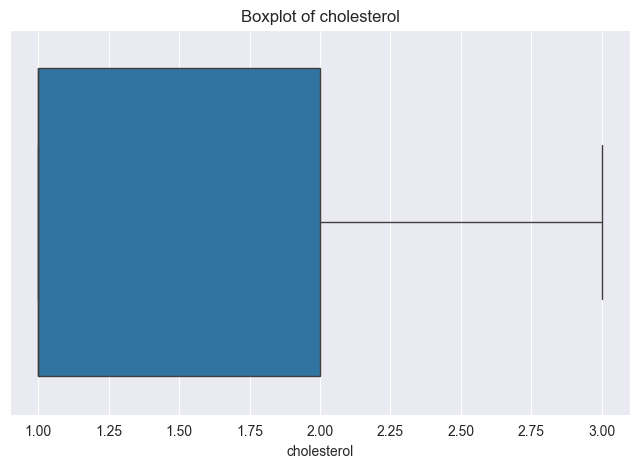

In [213]:
# Your code here:
q1_colesterol = df['cholesterol'].quantile(0.25)
q2_colesterol = df['cholesterol'].median()
q3_colesterol = df['cholesterol'].quantile(0.75)
iqr_colesterol = q3_colesterol-q1_colesterol
print(f'Q1 25th percentile of cholesterol: {q1_colesterol}')
print(f'Q1 75th percentile of cholesterol: {q2_colesterol}')
print(f'cholesterol median: {q2_colesterol}')
print(f"Interquartile Range (IQR) of cholesterol: {iqr_colesterol:.2f}")

plt.figure(figsize=(8,5))
sns.boxplot(x=df['cholesterol'])
plt.title('Boxplot of cholesterol')
plt.show()



### **Exercise 5: Grouped Analysis by Gender**  
**Question:** Calculate the **mean** of the **"weight"** column grouped by **"gender"**. 


In [214]:
# Your code here:
#group by gender and get mean weight
df_mean_weight = df.groupby('sex')['weight'].mean()

print(f'mean weight grouped by gender {df_mean_weight}')

mean weight grouped by gender sex
1    72.565902
2    77.258565
3    69.818182
Name: weight, dtype: float64
